In [1]:
import os
import numpy as np
import matplotlib.pyplot as  plt
import tensorflow as tf
import cv2
import PIL


C:\Users\91978\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir = "Terrain images"
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('Terrain images')

In [4]:
len(list(data_dir.glob('*/*.jpg')))

236

In [5]:
Grass_Terrain=list(data_dir.glob('Grass Terrain/*.jpg'))

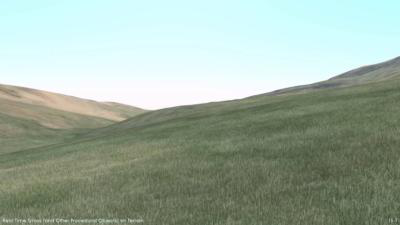

In [6]:
PIL.Image.open(str(Grass_Terrain[2]))

In [7]:
Image_dict={'grass':list(data_dir.glob('Grass Terrain/*.jpg')),'marshy':list(data_dir.glob('Marshy Terrain/*.jpg')),'rocky':list(data_dir.glob('Rocky Terrain/*.jpg')),'sandy':list(data_dir.glob('Sandy Terrain/*.jpg'))}

labels={'grass':0,'marshy':1,'rocky':2,'sandy':3}


In [8]:
X=[]
Y=[]
for name,images in Image_dict.items():
    for image in images:
        
        image=cv2.imread(str(image))
        img=cv2.resize(image,(224,224))
        X.append(img)
        Y.append(labels[name])

In [9]:
X=np.array(X)
Y=np.array(Y)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
augmentation=keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
                               layers.experimental.preprocessing.RandomZoom(0.3),
                               layers.experimental.preprocessing.RandomRotation(0.2),
                              ])

In [13]:
model= Sequential([augmentation,
                    layers.Conv2D(32, (3, 3),padding='same', activation='relu'), 
                    layers.MaxPooling2D((2, 2)),
                    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
                    layers.MaxPooling2D((2, 2)),
                    layers.Conv2D(128, (3, 3),padding='same', activation='relu'),
                    layers.MaxPooling2D((2, 2)),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(4, activation='softmax')])

                   
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=20)                   

Epoch 1/20
6/6 [==============================] - 7s 976ms/step - loss: 2.2388 - accuracy: 0.2926
Epoch 2/20
6/6 [==============================] - 6s 965ms/step - loss: 1.3170 - accuracy: 0.3351
Epoch 3/20
6/6 [==============================] - 6s 972ms/step - loss: 1.3248 - accuracy: 0.3138
Epoch 4/20
6/6 [==============================] - 6s 966ms/step - loss: 1.2074 - accuracy: 0.4096
Epoch 5/20
6/6 [==============================] - 6s 967ms/step - loss: 1.1917 - accuracy: 0.4149
Epoch 6/20
6/6 [==============================] - 6s 961ms/step - loss: 1.0263 - accuracy: 0.5638
Epoch 7/20
6/6 [==============================] - 6s 959ms/step - loss: 0.9559 - accuracy: 0.5745
Epoch 8/20
6/6 [==============================] - 6s 965ms/step - loss: 0.9114 - accuracy: 0.6170
Epoch 9/20
6/6 [==============================] - 6s 964ms/step - loss: 0.9611 - accuracy: 0.5798
Epoch 10/20
6/6 [==============================] - 6s 973ms/step - loss: 0.9621 - accuracy: 0.5851
Epoch 11/20
6/6 [==

In [14]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 121ms/step - loss: 1.3062 - accuracy: 0.6458


[1.3062114715576172, 0.6458333134651184]

In [15]:
predictions=model.predict(x_test)
predictions

2/2 [==============================] - 0s 121ms/step


array([[7.12098539e-01, 2.76425421e-01, 1.12856226e-02, 1.90369261e-04],
       [5.26408607e-04, 2.18759328e-02, 9.77487266e-01, 1.10393448e-04],
       [1.53259132e-02, 1.70706302e-01, 8.04359078e-01, 9.60870553e-03],
       [8.62132832e-02, 3.93146604e-01, 5.08622646e-01, 1.20174279e-02],
       [1.39151402e-02, 6.10276721e-02, 9.21244562e-01, 3.81261739e-03],
       [5.48567623e-02, 3.31294388e-01, 6.03009522e-01, 1.08393840e-02],
       [6.60663890e-03, 2.07317621e-01, 7.70348608e-01, 1.57271568e-02],
       [3.60105224e-02, 1.19443648e-01, 7.59675577e-02, 7.68578231e-01],
       [4.22342774e-03, 2.66736597e-02, 9.66912270e-01, 2.19069375e-03],
       [1.48075851e-04, 5.89046907e-03, 9.93492663e-01, 4.68864571e-04],
       [8.72326374e-01, 1.27528608e-01, 1.21345089e-04, 2.37142194e-05],
       [6.45732701e-01, 3.40775132e-01, 9.50683374e-03, 3.98534071e-03],
       [5.69230616e-02, 1.47231966e-01, 7.51646757e-01, 4.41982001e-02],
       [4.47259136e-02, 2.46833846e-01, 6.64241970e

In [16]:
val=[]
for i in predictions:
    a=np.argmax(i)
    val.append(a)
print(val[0])    

0


In [17]:
print(len(val))
print(len(y_test))

48
48


In [18]:
print(val[36])
print(y_test[36])

1
1
